## Comparison to Lund 1996

To better understanding these InSaNNe prediction use-cases, we examed published Fc glycosylation occupancy data [Lund, 1996].  These data measured the abundance of 7 complex and hybrid structures in human IgG3 for *wt* and glycosite (N297; P01860:N227) proximal mutatants. We compared InSaNNe predictions for the R301A and Y296A mutants and found that predicted-presence, predicted-presence-rank and change in predicted-presence were correlated with glycan occupancy.

We found that InSaNNe predicted-presence and predicted-presence rank were both correlated with measured log-abundance [Lund, 1996]. Abundance-prediction consistency was high for the R301A abundance (0.67<R^2<0.72; FIGX) and *wt* abundance (0.56<R^2<0.61; FIGX), correlation was not consistently high. Predicted-presence was a weaker predictor of measured IgG3:N297 in the Y296A mutant (0.33<R^2<0.36; FIGX). Interestingly, prediction consistency increased when the mutant and *wt* predicted presence values were compared directly. The log-fold-change in predicted-presence in R301A relative to *wt* was highly correlated with measured log-abundance (0.81 R^2 ; FIGX). The higher consistency with relative measures like log-fold-change suggests predicted-presence is most useful as a relative measure of abundance. 

In [29]:
from sklearn.metrics import r2_score

def cor_plot(x,y,dig='.',color='black',tx=0.05, ty=0.95,fig=None,ax=None,labels=None):
  
  ax.plot(x,y,dig, ms=10 , color=color)
  z = np.polyfit(x, y, 1)
  y_hat = np.poly1d(z)(x)
  
  ax.plot(x, y_hat, "r--", lw=1,color=color)
  text = f"$R^2 = {r2_score(y,y_hat):0.3f}$"
  plt.gca().text(tx,ty, text,transform=plt.gca().transAxes,
      fontsize=14 , verticalalignment='top',color=color)
  
  if ((ax is not None) and (labels is not None)):
    for i, txt in enumerate(labels):
      ax.annotate(txt, (x[i], y[i]),textcoords="offset points",
                  xytext=(0,10),ha='center') 

In [31]:
base_dir_lund='files/results/Lund_Validation/'

In [32]:
al_sect=None

,idx,Glycan,wt,Y296A,R301A
idx,,,,,
A,A,GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Ma...,7.1,18.0,0.1
B,B,Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man...,1.5,0.7,0.1
C,C,GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man...,0.9,1.7,0.1
D,D,Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc...,0.8,2.5,14.6
E,E,GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Ma...,35.4,44.9,1.2
F,F,Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man...,27.7,1.9,8.4
G,G,GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man...,8.8,6.6,1.7
H,H,Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc...,9.6,1.6,69.8
d,d,*Man(a1-6)[Man(a1-3)]Man(a1-6)[Man(a1-2)Man(a1...,2.1,8.5,1.0


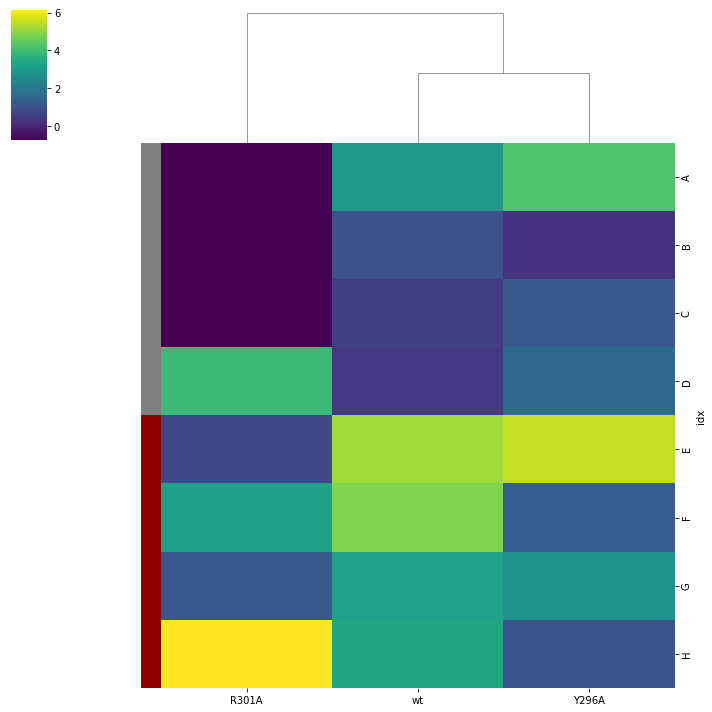

In [33]:
psc = .1

data_df = pd.DataFrame({'idx':['A','B','C','D','E','F','G','H','d','e'],
                   'Glycan':[   'GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                                'Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                                'GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                                'Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                                'GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                                'Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                                'GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                                'Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                                '*Man(a1-6)[Man(a1-3)]Man(a1-6)[Man(a1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                                '*Man(a1-6)[Man(a1-3)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
                                #'Man(b1-2)Man(b1-3)[Man(b1-3)[Man(b1-6)]Man(b1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                                #          'Man(b1-3)[Man(b1-3)[Man(b1-6)]Man(b1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
                                         ],
                   'wt':[7,1.4,0.8,0.7,35.3,27.6,8.7,9.5,2.0,7.0],
                   'Y296A':[17.9,0.6,1.6,2.4,44.8,1.8,6.5,1.5,8.4,14.5],
                   'R301A':[0,0,0,14.5,1.1,8.3,1.6,69.7,0.9,3.9]})
data_df.index = data_df['idx']
# data_df.Glycan = [normalize_glycan(g) for g in data_df.Glycan]



data_df['wt'] = data_df['wt']+psc
data_df['Y296A'] = data_df['Y296A']+psc
data_df['R301A'] = data_df['R301A']+psc

display(data_df)

alt_idx = [0,4,1,5,2,6,3,7]
tmp = data_df.copy(True) #.iloc[alt_idx]

# for gi in data_df.Glycan: 
#   plot(daniel_to_iupac(gi))

cols = ['grey']*4 + ['darkred']*4 #).iloc[alt_idx]

plt_clst=sns.clustermap( np.log2( tmp[0:8][['wt','Y296A','R301A']] +0.5 ),row_cluster=False,
              #z_score=1,
               cmap="viridis",
               row_colors=cols ) #+ ['grey']*2)


plt_clst.savefig(base_dir_lund+'lund1996_clustermap.pdf')


wt: 
- preference to fucosylation (E>A, F>B, G>C, H>D)
- preference to fewer galactose (H & G < F & E, A > {B, C, D})
- permits gal on the b1-6 branch (F>0)

Y->A (upstream)
- fucose is still preferred (E>A)
- all galactosylation decreases 

R->A (downstream)
- fucose is still preferred 
- galactose increases dramatically

In [ ]:
import scipy.stats as ss
import matplotlib.pyplot as plt

### get lfc for observed abundance
data_df['Y296A_lfc'] = np.log( data_df.Y296A/data_df.wt )
data_df['R301A_lfc'] = np.log( data_df.R301A/data_df.wt )

### get predicted abundance
wt_df    = pred_wrapper(sq1=string_to_labels('EEQYNSTFRV', chars),
             st1=[21]*10,do_norm=True,ecdf_norm=bknd,alpha=None).rename(columns={'predicted_presence':'pp_wt'})
R301A_df = pred_wrapper(sq1=string_to_labels('EEQYNSTFAV', chars),
             st1=[21]*10,do_norm=True,ecdf_norm=bknd,alpha=None).rename(columns={'predicted_presence':'pp_R301A'})
Y296A_df = pred_wrapper(sq1=string_to_labels('EEQANSTFRV', chars),
             st1=[21]*10,do_norm=True,ecdf_norm=bknd,alpha=None).rename(columns={'predicted_presence':'pp_Y296A'})

data_df = data_df.merge(wt_df,how='left',on='Glycan').dropna()
data_df = data_df.merge(R301A_df,how='left',on='Glycan').dropna()
data_df = data_df.merge(Y296A_df,how='left',on='Glycan').dropna()

### try rank
if False:
  data_df.pp_wt = ss.rankdata(data_df.pp_wt)
  data_df.pp_Y296A = ss.rankdata(data_df.pp_Y296A)
  data_df.pp_R301A = ss.rankdata(data_df.pp_R301A)

### get predicted lfc
data_df['Y296A_pp_lfc'] = np.log( data_df.pp_Y296A/data_df.pp_wt )
data_df['R301A_pp_lfc'] = np.log( data_df.pp_R301A/data_df.pp_wt )


/tmp/ipykernel_2133984/3090887885.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y_hat, "r--", lw=1,color=color)
/tmp/ipykernel_2133984/3090887885.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y_hat, "r--", lw=1,color=color)
/tmp/ipykernel_2133984/3090887885.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y_hat, "r--", lw=1,color=color)
/tmp/ipykernel_2133984/3090887885.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y_hat, "r--", lw=1,color=color)
/tmp/ipykernel_2133984/30908

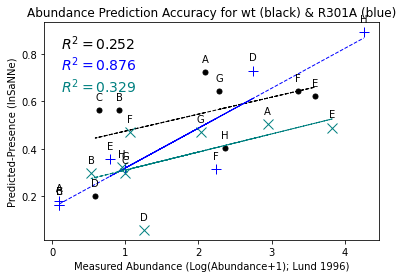

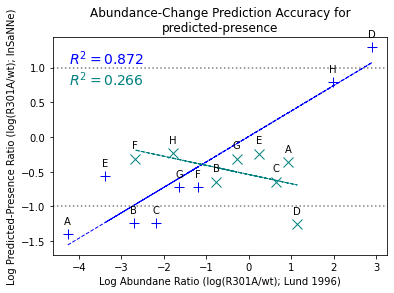

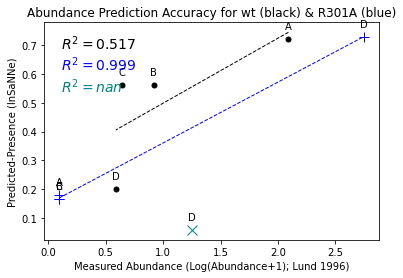

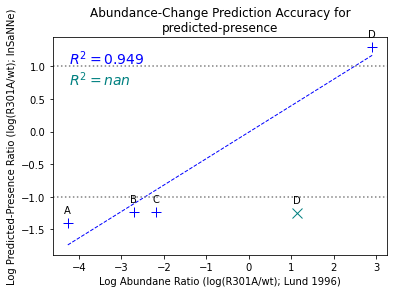

In [35]:
thresh = 0

###################

r2a = data_df.copy(True)[np.abs(data_df.R301A_pp_lfc)>thresh]
r2a.index = range(r2a.shape[0])

y2a = data_df.copy(True)[np.abs(data_df.Y296A_pp_lfc)>thresh]
y2a.index = range(y2a.shape[0])

# display(y2a)

# display(r2a)


fig,ax = plt.subplots()
cor_plot(np.log1p(r2a.wt),r2a.pp_wt,fig=fig,ax=ax,labels=r2a.idx)
cor_plot(np.log1p(r2a.R301A),r2a.pp_R301A,color='blue',ty=0.85,dig="+",fig=fig,ax=ax,labels=r2a.idx)
cor_plot(np.log1p(y2a.Y296A),y2a.pp_Y296A,color='teal',ty=0.75,dig="x",fig=fig,ax=ax,labels=y2a.idx)
plt.xlabel('Measured Abundance (Log(Abundance+1); Lund 1996)')
plt.ylabel('Predicted-Presence (InSaNNe)')
plt.title('Abundance Prediction Accuracy for wt (black) & R301A (blue)')
# @ lfc>1, r^2=.5 & .999
fig.savefig(base_dir_lund+'both_cor.pdf')


fig,ax = plt.subplots()
cor_plot( r2a.R301A_lfc, r2a.R301A_pp_lfc ,color='blue',dig="+",fig=fig,ax=ax,labels=r2a.idx)
cor_plot( y2a.Y296A_lfc, y2a.Y296A_pp_lfc ,color='teal',ty=0.85,dig="x",fig=fig,ax=ax,labels=y2a.idx)
plt.axhline(y = 1, color = 'grey', linestyle = ':')
plt.axhline(y = -1, color = 'grey', linestyle = ':')
plt.xlabel('Log Abundane Ratio (log(R301A/wt); Lund 1996)')
plt.ylabel('Log Predicted-Presence Ratio (log(R301A/wt); InSaNNe)')
plt.title('Abundance-Change Prediction Accuracy for\npredicted-presence')
# @ lfc>1, r^2=.949
fig.savefig(base_dir_lund+'both_lfc_cor.pdf')


#############################

thresh = 1

###################

r2a = data_df.copy(True)[np.abs(data_df.R301A_pp_lfc)>thresh]
r2a.index = range(r2a.shape[0])

y2a = data_df.copy(True)[np.abs(data_df.Y296A_pp_lfc)>thresh]
y2a.index = range(y2a.shape[0])

# display(y2a)

# display(r2a)


fig,ax = plt.subplots()
cor_plot(np.log1p(r2a.wt),r2a.pp_wt,fig=fig,ax=ax,labels=r2a.idx)
cor_plot(np.log1p(r2a.R301A),r2a.pp_R301A,color='blue',ty=0.85,dig="+",fig=fig,ax=ax,labels=r2a.idx)
cor_plot(np.log1p(y2a.Y296A),y2a.pp_Y296A,color='teal',ty=0.75,dig="x",fig=fig,ax=ax,labels=y2a.idx)
plt.xlabel('Measured Abundance (Log(Abundance+1); Lund 1996)')
plt.ylabel('Predicted-Presence (InSaNNe)')
plt.title('Abundance Prediction Accuracy for wt (black) & R301A (blue)')
# @ lfc>1, r^2=.5 & .999
fig.savefig(base_dir_lund+'both_cor.1.pdf')


fig,ax = plt.subplots()
cor_plot( r2a.R301A_lfc, r2a.R301A_pp_lfc ,color='blue',dig="+",fig=fig,ax=ax,labels=r2a.idx)
cor_plot( y2a.Y296A_lfc, y2a.Y296A_pp_lfc ,color='teal',ty=0.85,dig="x",fig=fig,ax=ax,labels=y2a.idx)
plt.axhline(y = 1, color = 'grey', linestyle = ':')
plt.axhline(y = -1, color = 'grey', linestyle = ':')
plt.xlabel('Log Abundane Ratio (log(R301A/wt); Lund 1996)')
plt.ylabel('Log Predicted-Presence Ratio (log(R301A/wt); InSaNNe)')
plt.title('Abundance-Change Prediction Accuracy for\npredicted-presence')
# @ lfc>1, r^2=.949
fig.savefig(base_dir_lund+'both_lfc_cor.1.pdf')



## Enhanced aeromatic sequon

In [40]:
al_sect=None
base_dir_EAS='files/results/EnhancedAroSq_Validation/'

Enhanced aeromatic seqon: L->F


/home/ben/anaconda3/envs/gtspec/lib/python3.8/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


{   'Both': [],
    'F': [],
    'L': [   'Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[NeuNAc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
             'NeuNAc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
             'NeuNAc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[NeuNAc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
             'NeuNAc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[NeuNAc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
             'NeuNAc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[NeuNAc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
             'NeuNAc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[NeuNAc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc']}


(998, 6)

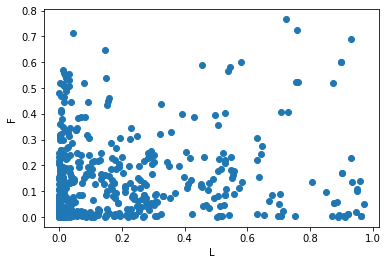

In [41]:


print('Enhanced aeromatic seqon: L->F')
### L->F (10.1016/j.chembiol.2015.06.017) predicted (and previously shown) do decrease complex glyosylation
L2F=get_diffs(string_to_labels('LANGT', chars), [21]*10,'L',
              string_to_labels('FANGT', chars), [21]*10,'F',diff=0,do_norm=True,alpha=al_sect)
pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(L2F.Glycan.tolist())
#L2F

pp.pprint({'Both':L2F.Glycan[(L2F.predicted_presence_x>.95) & (L2F.predicted_presence_y>.95)].tolist(),
           'L':L2F.Glycan[(L2F.predicted_presence_x>.95) & (L2F.predicted_presence_y<.95)].tolist(),
           'F':L2F.Glycan[(L2F.predicted_presence_x<.95) & (L2F.predicted_presence_y>.95)].tolist()})

convert_names = {'predicted_presence_x':'L','predicted_presence_y':'F'}

L2F = pd.melt(L2F,id_vars='Glycan')
L2F['NeuNAc'] = L2F.Glycan.str.count('NeuNAc')
L2F['Gal'] = L2F.Glycan.str.count('Gal\\(')
# L2F = L2F[L2F['NeuNAc']<L2F['Gal']]
L2F['variable'] = [convert_names[i] for i in L2F['variable']]
L2F['NeuNAc'] = [str(i) for i in L2F.Glycan.str.count('NeuNAc')]
L2F['Gal'] = [str(i) for i in L2F.Glycan.str.count('Gal\\(')]
L2F['Man'] = [str(i) for i in L2F.Glycan.str.count('Man')]
L2F
display(L2F.shape)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_L v.s. 1_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.430e-09 U_stat=1.257e+04
0_L v.s. 0_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.480e-25 U_stat=1.187e+04
2_L v.s. 2_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.371e-10 U_stat=4.808e+03
3_L v.s. 3_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.580e-10 U_stat=1.745e+03
4_L v.s. 4_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.388e-03 U_stat=1.330e+02


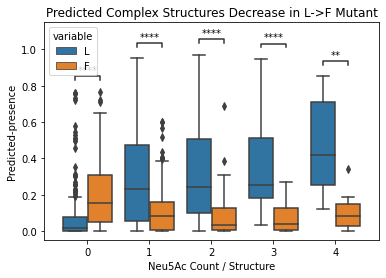

In [42]:
df = L2F
x = 'NeuNAc'
y = "value"
hue='variable'
hue_order=['L','F']
order = ['0','1','2','3','4']
ax = sns.boxplot(data=df, x=x, y=y,hue=hue ) #, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, #order=order,
                                   box_pairs=[(('0','L'),('0','F')),(('1','L'),('1','F')),
                                              (('2','L'),('2','F')),(('3','L'),('3','F')),
                                              (('4','L'),('4','F'))],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2)
test_results
plt.title('Predicted Complex Structures Decrease in L->F Mutant')
plt.ylabel('Predicted-presence')
plt.xlabel('Neu5Ac Count / Structure')

plt.savefig(base_dir_EAS+'NeuNAc.pdf')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_L v.s. 2_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.440e-03 U_stat=8.932e+03
1_L v.s. 1_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.647e+03
5_L v.s. 5_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.917e-01 U_stat=9.200e+01
3_L v.s. 3_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.176e-11 U_stat=4.725e+03
4_L v.s. 4_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.748e-02 U_stat=9.200e+02
6_L v.s. 6_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.667e-01 U_stat=2.100e+01
7_L v.s. 7_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00


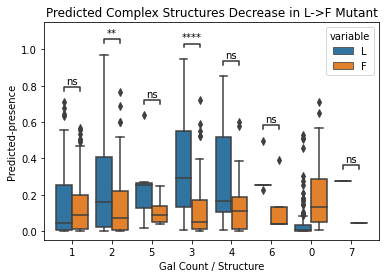

In [43]:
#############
df = L2F
x = 'Gal'
y = "value"
hue='variable'
hue_order=['L','F']
order = ['1','2','3','4','5','6','7']
ax = sns.boxplot(data=df, x=x, y=y,hue=hue ) #, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, #order=order,
                                   box_pairs=[(('1','L'),('1','F')),(('2','L'),('2','F')),(('3','L'),('3','F')),
                                              (('4','L'),('4','F')),(('5','L'),('5','F')),
                                              (('6','L'),('6','F')),(('7','L'),('7','F'))],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2)
test_results
plt.title('Predicted Complex Structures Decrease in L->F Mutant')
plt.ylabel('Predicted-presence')
plt.xlabel('Gal Count / Structure')

plt.savefig(base_dir_EAS+'Gal.pdf')


['3', '4', '5', '6', '7', '8', '9']

variable,F,L
Man,,
3,419,419
4,14,14
5,19,19
6,7,7
7,7,7
8,5,5
9,4,4


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4_L v.s. 4_F: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=4.331e-01 U_stat=6.400e+01
3_L v.s. 3_F: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=1.000e+00 U_stat=9.869e+04
5_L v.s. 5_F: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=6.830e-02 U_stat=1.000e+02
6_L v.s. 6_F: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=4.487e-01 U_stat=1.200e+01
7_L v.s. 7_F: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=8.159e-03 U_stat=2.000e+00
8_L v.s. 8_F: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=1.944e-01 U_stat=3.000e+00
9_L v.s. 9_F: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=2.000e-01 U_stat=1.000e+00


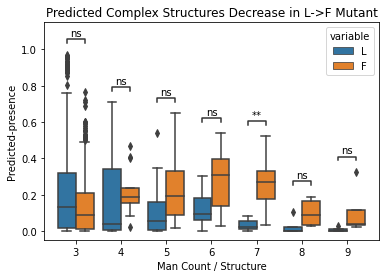

In [44]:
#############
order = [str(i) for i in range(3,10)] # ['3','4','5','6']
display(order)
#display(pd.crosstab(L2F['Man'],L2F['variable']))

df = L2F[L2F['Man'].isin(order)]
x = 'Man'
y = "value"
hue='variable'
hue_order=['L','F']

display(pd.crosstab(df['Man'],df['variable']))

ax = sns.boxplot(data=df, x=x, y=y,hue=hue , order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, order=order,
                                   box_pairs=[((str(i),'L'),(str(i),'F')) for i in order],
                                   test='Mann-Whitney-ls', text_format='star',
                                   loc='inside', verbose=2)
#  t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal.
test_results
plt.title('Predicted Complex Structures Decrease in L->F Mutant')
plt.ylabel('Predicted-presence')
plt.xlabel('Man Count / Structure')

plt.savefig(base_dir_EAS+'Man.pdf')


In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# formula: response ~ predictor + predictor
#est = smf.ols(formula='Sales ~ TV + Radio', data=df_adv).fit()
#spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
df = L2F[L2F['Man'].isin(order[1::])]
df['Man'] = [int(i) for i in df['Man']]
df.head()
# Fit and summarize OLS model
mod = smf.ols('value ~ Man+C(variable)', data=df).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.69e-05
Time:                        01:07:39   Log-Likelihood:                 49.577
No. Observations:                 112   AIC:                            -93.15
Df Residuals:                     109   BIC:                            -85.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3648      0.059  

/tmp/ipykernel_2133984/3147251958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Man'] = [int(i) for i in df['Man']]


## SARS-COV-2 glycosylation prediction

**** REWRITE: UPDATED RESULTS ******

Given the current importance of coronavirus-insight and the ubiquity and esentiality of spike-glycosylation to SARS-CoV-2 infection[cite Fadda, Wells,Crispin], we were compeled to apply our findings to prevelant and glycosite-proximal SARS-CoV-2 spike protein varients. We specifically examin D614G, an early varient that increased viral load [Kolber], and B.1.1.1.7:T716I, a recent varient that appears to increase transmissibility [???].

Comparing D614 and G614-Spike predictions for the N616 glycosite we project changes in glycosylation consistent with existing work. First, InSaNNe predicts mono and di-sialylated biantennary glycans at N616 in D614-spike. N616-sialylation is validated in repeated measurements of the D614-spike glycoprofile, N616 presents high-complexity (sialylated glycans)[Crispin,Wells]. Distinctly, InSaNNe predicts high-viral-load varient, G614, will loose the sialylated glycans in exchange for terminal-Gal and terminal-GlcNAc structures with and without branch fucosylation. 

Examining the more current B.1.1.7:T716I substitution, we predict the substitution impact on glycosylation at N717. We predict a large diversity of hybrid structures observed in multiple emperical measurements [Wells, Crispin]. Previous studies also observed oligomannose, since InSaNNe predicts the "permisible" glycan, if a more complex glycan is feasible, lower complexity glycans should also be feasible; we belive the algorithm predicts the upper-bound of complexity. InSaNNe predicts a dramatic decrease in diversity at N717 in the I716-spike varient permitting only a large paucimannose and a terminal-galactose biantennary structure. 

N616 is within a predicted HLA antigen region [Grant/Wood]. Additionally, both N616 and N717 are within regions where antibody accessibility is impacted by glycosylation [Grant/Wood]. Therefore, differential glycosylation here could impact immune recognition of SARS-CoV-2.

In [46]:
base_dir_SPIKE='files/results/SPIKE_Validation/'
spike_source='>sp|P0DTC2|SPIKE_SARS2 Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=S PE=1 SV=1'
spike_seq='MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'

filen = 'files/data-input/SARS_CoV_2_spike/wantanabe2020.csv'
wata2020 = pd.read_csv(filen)
wata2020

,site,high_mannose,lab,Mannose_perc
0,17,0,complex,4
1,61,1,mannose,69
2,74,0,complex,4
3,122,-1,hybrid,56
4,149,0,complex,8
5,165,0,complex,0
6,234,1,mannose,97
7,282,0,complex,1
8,331,0,complex,2
9,343,0,complex,2


### wt verion 2 (with site specific background)

In [ ]:
# pred = pred_glycosite_w_background('EEQYNSTFRV',N=30)

print('wt validation v2')
SPIKE_site=[17,61,74,122,149,165,234,282,331,343,603,616,717,801,1098,1134,1194]
rng = 5

preds_spike=[]

for site in SPIKE_site:
  site_str = spike_seq[ site-rng : site+rng ]
  print(site_str)
  tmp=pred_glycosite_w_background(site_str,N=100)
  tmp['site']=site
  preds_spike.append(tmp)

preds_spike = pd.concat(preds_spike,ignore_index=True).merge(wata2020,on='site')

preds_spike['NeuNAc'] = [str(i) for i in preds_spike.Glycan.str.count('NeuNAc')]
preds_spike['Gal'] = [str(i) for i in preds_spike.Glycan.str.count('Gal\\(')]
preds_spike['Man'] = [str(i) for i in preds_spike.Glycan.str.count('Man')]

In [49]:
fileout = 'files/data-intermediate/SARS_CoV_2_spike.wt_pred.csv'
preds_spike.to_csv(fileout)


/tmp/ipykernel_2133984/1487233482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_tmp['high_mannose'] = preds_tmp['Man'].astype(int)>5


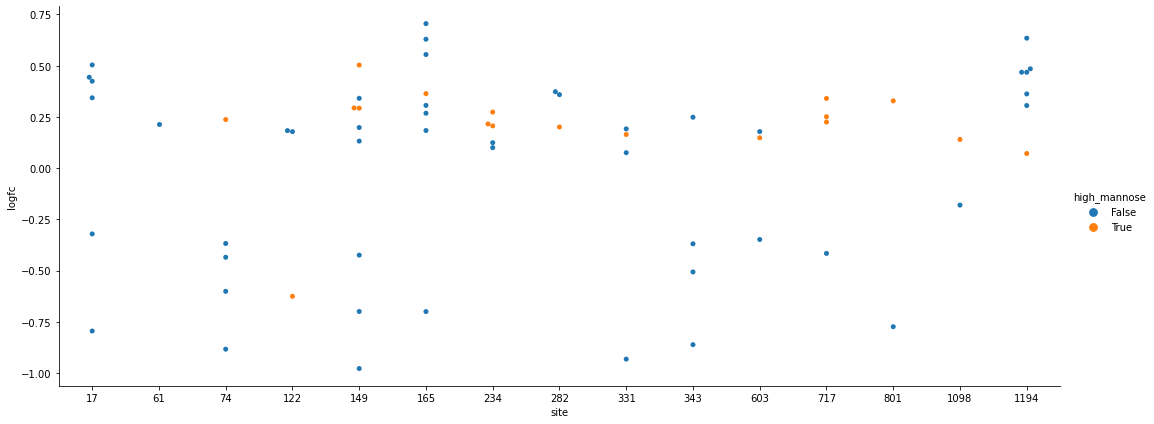

In [50]:
ki='swarm'
#keep = ((preds_spike['site'].isin([234,717,801]) & preds_spike['q']<.1) & preds_spike['pp_base']>.2) & abs(preds_spike['logfc'])>.1
keep = np.array(preds_spike['q']<.1) & np.array(preds_spike['pp_base']>.1) & np.array(abs(preds_spike['logfc'])>.01) & \
        (np.array(preds_spike.Man.astype(int)==9) | np.array(preds_spike.NeuNAc.astype(int)==4))
preds_tmp = preds_spike[keep]
preds_tmp['high_mannose'] = preds_tmp['Man'].astype(int)>5
preds_tmp.head()

# f, ax = plt.subplots(figsize=(7, 7))
# ax.set(xscale="log")
# sns.scatterplot(data=pred,x='pp_base',y='logfc',hue='signif',ax=ax)
g=sns.catplot(x="site", y="logfc",
                hue="high_mannose", #col="NeuNAc",
                data=preds_tmp, 
                kind=ki,
                height=6,
                aspect=2.5)



### wt version 1

In [ ]:
print('wt validation')
SPIKE_site=[17,61,74,122,149,165,234,282,331,343,603,616,717,801,1098,1134,1194]
rng = 5

preds_spike=[]

for site in SPIKE_site:
  site_str = spike_seq[ site-rng : site+rng ]
  print(site_str)
  tmp=pred_wrapper(sq1 = string_to_labels( site_str, chars) , st1=[21]*10,alpha=None )
  tmp['site']=site
  preds_spike.append(tmp)

preds_spike = pd.concat(preds_spike,ignore_index=True).merge(wata2020,on='site')

preds_spike['NeuNAc'] = [str(i) for i in preds_spike.Glycan.str.count('NeuNAc')]
preds_spike['Gal'] = [str(i) for i in preds_spike.Glycan.str.count('Gal\\(')]
preds_spike['Man'] = [str(i) for i in preds_spike.Glycan.str.count('Man')]

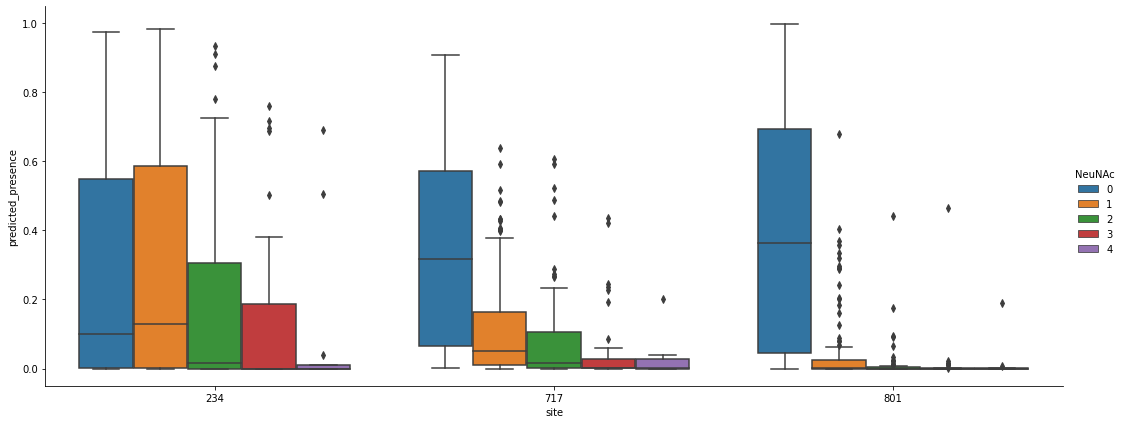

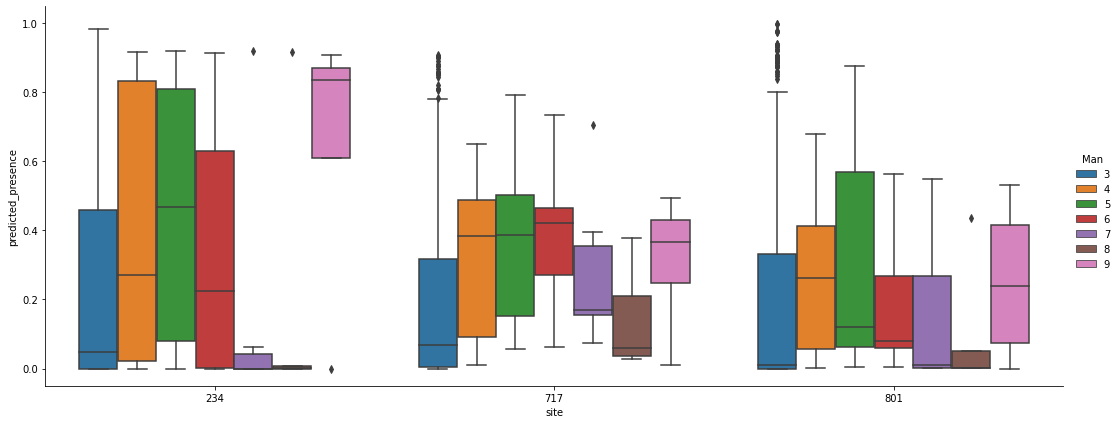

In [52]:
# sns.set(rc={'figure.figsize':(11.7,20)})
ki='box'
sns.catplot(x="site", y="predicted_presence",
                hue="NeuNAc", #col="NeuNAc",
                data=preds_spike[preds_spike['site'].isin([234,717,801])], kind=ki,
                height=6,#width=10,
                aspect=2.5);
plt.savefig(base_dir_SPIKE+'NeuNAc_highmannose.v2.pdf')


sns.catplot(x="site", y="predicted_presence",
                hue="Man", #col="NeuNAc",
                hue_order = [str(i) for i in range(3,10)],
                data=preds_spike[preds_spike['site'].isin([234,717,801])], kind=ki,
                height=6,#width=10,
                aspect=2.5);
plt.savefig(base_dir_SPIKE+'Man_highmannose.v2.pdf')

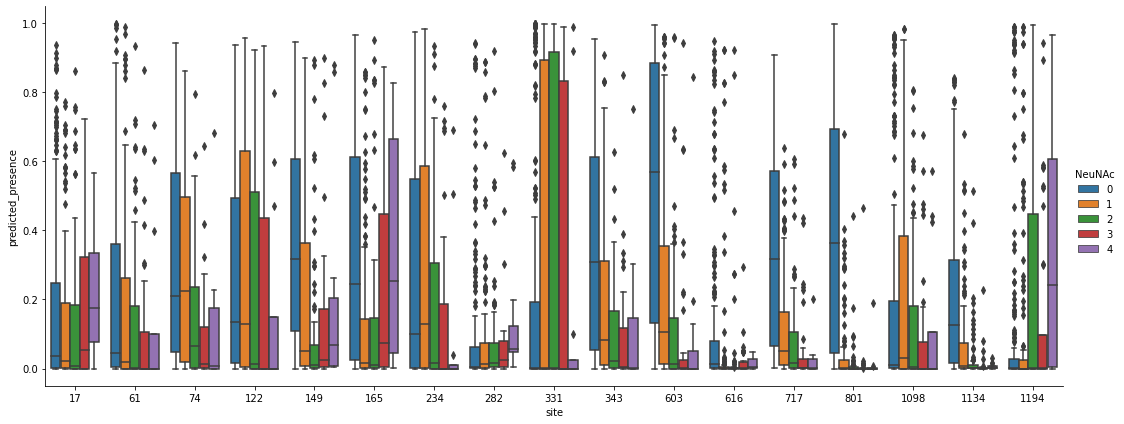

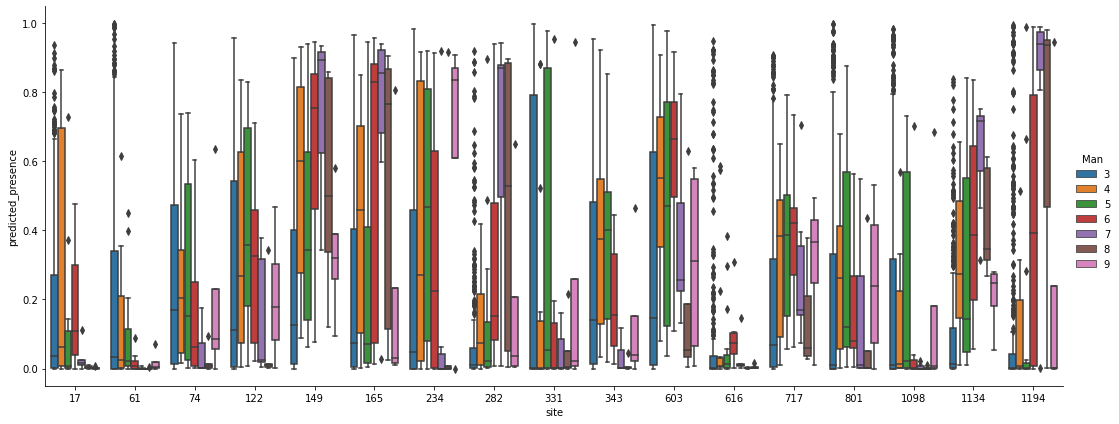

In [53]:
# sns.set(rc={'figure.figsize':(11.7,20)})
ki='box'
sns.catplot(x="site", y="predicted_presence",
                hue="NeuNAc", #col="NeuNAc",
                data=preds_spike, kind=ki,
                height=6,#width=10,
                aspect=2.5);
plt.savefig(base_dir_SPIKE+'NeuNAc.v2.pdf')


sns.catplot(x="site", y="predicted_presence",
                hue="Man", #col="NeuNAc",
                hue_order = [str(i) for i in range(3,10)],
                data=preds_spike, kind=ki,
                height=6,#width=10,
                aspect=2.5);
plt.savefig(base_dir_SPIKE+'Man.v2.pdf')


In [54]:
#preds_spike.merge(wata2020,on='site')
def boxplot_compare(df,x,y,order,hue,hue_order):
  display(pd.crosstab(df[x],df[hue]))

  ax = sns.boxplot(data=df, x=x, y=y,hue=hue , order=order,hue_order=hue_order)
  test_results = add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, order=order,hue_order=hue_order,
                                    box_pairs=[((str(i),hue_order[0]),(str(i),hue_order[1])) for i in order]+
                                              [((str(i),hue_order[0]),(str(i),hue_order[2])) for i in order]+
                                              [((str(i),hue_order[1]),(str(i),hue_order[2])) for i in order],
                                    test='Mann-Whitney', text_format='star',
                                    loc='inside', verbose=2)
  #  t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal.
  #test_results
  # plt.title('Predicted Complex Structures Decrease in L->F Mutant')
  plt.ylabel('Predicted-presence')
  plt.xlabel(x+' Count / Structure')


lab,complex,hybrid,mannose
NeuNAc,,,
0,2574,468,936
1,1452,264,528
2,847,154,308
3,484,88,176
4,132,24,48


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_complex v.s. 2_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.112e+04
3_complex v.s. 3_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.270e+04
4_complex v.s. 4_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.359e-01 U_stat=1.974e+03
1_hybrid v.s. 1_mannose: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.174e-06 U_stat=8.600e+04
2_hybrid v.s. 2_mannose: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.942e-03 U_stat=2.851e+04
3_hybrid v.s. 3_mannose: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.561e-03 U_stat=9.801e+03
4_hybrid v.s. 4_mannose: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.

lab,complex,hybrid,mannose
Man,,,
0,209,38,76
10,22,4,8
11,22,4,8
2,11,2,4
3,4609,838,1676
4,154,28,56
5,209,38,76
6,77,14,28
7,77,14,28


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

5_complex v.s. 5_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.577e-04 U_stat=2.156e+03
6_complex v.s. 6_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.889e-01 U_stat=3.580e+02
7_complex v.s. 7_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.910e+02
8_complex v.s. 8_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.620e+02
9_complex v.s. 9_hybrid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.240e+02
4_hybrid v.s. 4_mannose: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.216e-01 U_stat=1.054e+03
5_hybrid v.s. 5_mannose: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.

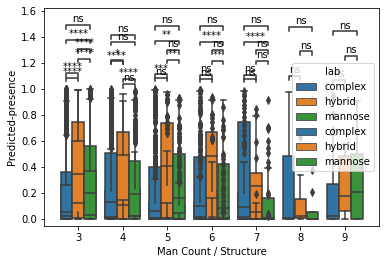

In [55]:
plt1=boxplot_compare(df=preds_spike,x='NeuNAc',y='predicted_presence',hue='lab',
                order=[str(i) for i in range(0,5)],hue_order=['complex','hybrid','mannose'])

plt1=boxplot_compare(df=preds_spike,x='Man',y='predicted_presence',hue='lab',
                order=[str(i) for i in range(3,10)],hue_order=['complex','hybrid','mannose'])

Spike protein site 616


/home/ben/anaconda3/envs/gtspec/lib/python3.8/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Spike protein site B.1.1.7:T716I; https://virological.org/t/preliminary-genomic-characterisation-of-an-emergent-sars-cov-2-lineage-in-the-uk-defined-by-a-novel-set-of-spike-mutations/563


/home/ben/anaconda3/envs/gtspec/lib/python3.8/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


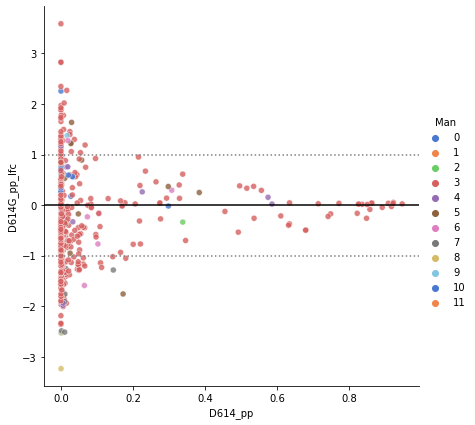

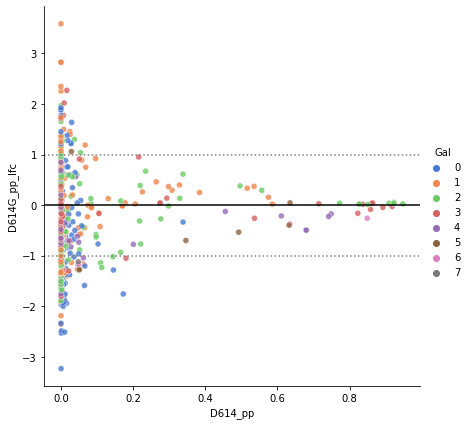

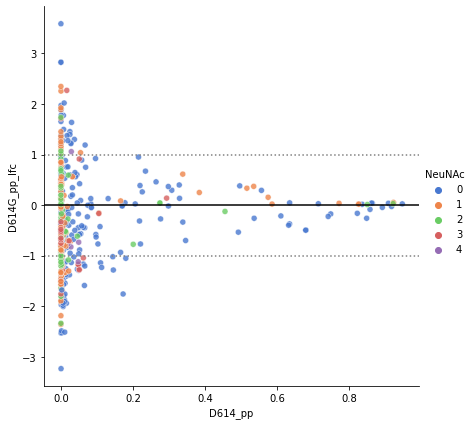

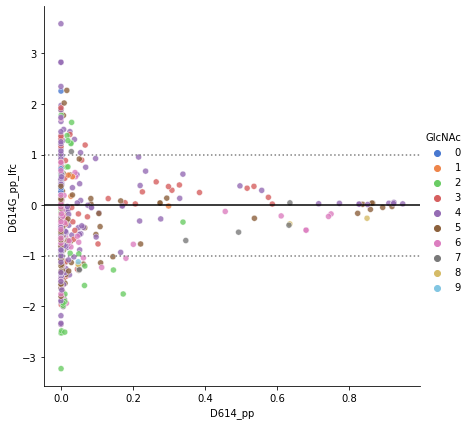

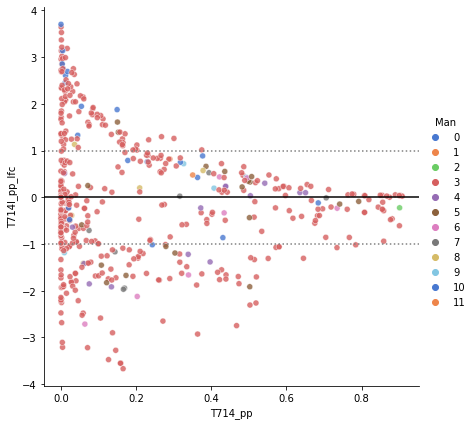

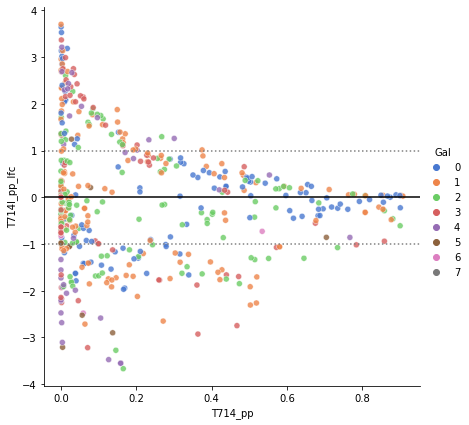

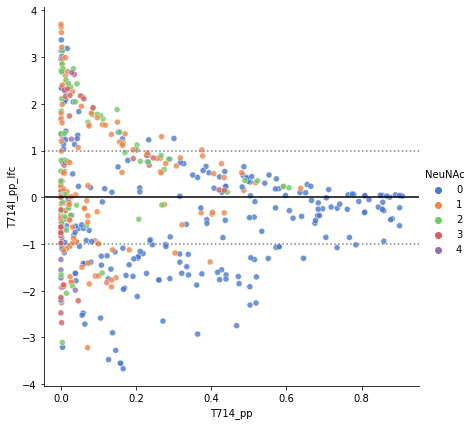

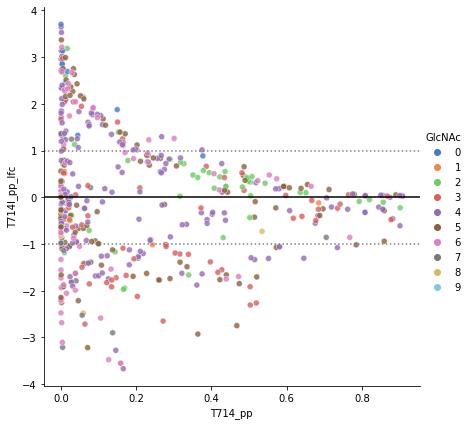

In [56]:
monosach = ['Man','Gal\\(','NeuNAc','GlcNAc']
monosach_n = ['Man','Gal','NeuNAc','GlcNAc']


print('Spike protein site 616')
d2g=get_diffs(string_to_labels('YQDVNCTEVP', chars), [21]*10,'Spike-D614',
              string_to_labels('YQGVNCTEVP', chars), [21]*10,'Spike-G614',  
              diff=0,do_norm=True,alpha=None,make_plot=False)
d2g = d2g.rename(columns={'predicted_presence_x':'D614_pp','predicted_presence_y':'G614_pp'})
d2g['D614G_pp_lfc'] = np.log2( d2g.G614_pp/d2g.D614_pp )
d2g = d2g.dropna()


for i in range(len(monosach)):
  d2g[monosach_n[i]] = [str(i) for i in d2g.Glycan.str.count(monosach[i])]
  # d2g = d2g[np.array(d2g['Man'].astype(int).isin([3,9]))]

  sns.relplot(y="D614G_pp_lfc", x="D614_pp", hue=monosach_n[i], #size="weight",
              sizes=(40, 400), alpha=.8, palette="muted",
              hue_order=[str(i) for i in range(1+max([int(i) for i in d2g[monosach_n[i]]]))],
              height=6, data=d2g)
  plt.axhline(y = 1, color = 'grey', linestyle = ':')
  plt.axhline(y = 0, color = 'black')
  plt.axhline(y = -1, color = 'grey', linestyle = ':')
  plt.savefig(base_dir_SPIKE+'D614G_'+monosach_n[i]+'.pdf')



####
print('Spike protein site B.1.1.7:T716I; https://virological.org/t/preliminary-genomic-characterisation-of-an-emergent-sars-cov-2-lineage-in-the-uk-defined-by-a-novel-set-of-spike-mutations/563')
t2i=get_diffs(string_to_labels('AIPTNFTISV', chars), [21]*10,'Spike-T714',
              string_to_labels('AIPINFTISV', chars), [21]*10,'Spike-I714',
              diff=0,do_norm=True,alpha=None,make_plot=False)

t2i = t2i.rename(columns={'predicted_presence_x':'T714_pp','predicted_presence_y':'I714_pp'})
t2i['T714I_pp_lfc'] = np.log2( t2i.I714_pp/t2i.T714_pp )
t2i = t2i.dropna()

for i in range(len(monosach)):
  t2i[monosach_n[i]] = [str(i) for i in t2i.Glycan.str.count(monosach[i])]

  sns.relplot(y="T714I_pp_lfc", x="T714_pp", hue=monosach_n[i], #size="weight",
              sizes=(40, 400), alpha=.8, palette="muted",
              hue_order=[str(i) for i in range(1+max([int(i) for i in t2i[monosach_n[i]]]))],
              height=6, data=t2i)
  plt.axhline(y = 1, color = 'grey', linestyle = ':')
  plt.axhline(y = 0, color = 'black')
  plt.axhline(y = -1, color = 'grey', linestyle = ':')
  plt.savefig(base_dir_SPIKE+'B117_'+monosach_n[i]+'.pdf')


